## 2- Análise de Regressão com Dados do Mercado Imobiliário de Nova York

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [66]:
path = "../data/07_mercado_imobiliário_ny.csv"

df = pd.read_csv(path, sep=',', encoding='latin-1')

print(f'Tamanho da base: {df.shape[0]} registros e {df.shape[1]} variáveis')

print(f'Variáveis: {list(df.columns)}')

print(df.dtypes)

df.tail(10)

Tamanho da base: 4801 registros e 17 variáveis
Variáveis: ['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE']
BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4791,Brokered by Corcoran East Side,Co-op for sale,370000,3,1.0,2184.207862,342 E 53rd St Apt 6C,"New York, NY 10022","342 E 53rd St Apt 6CNew York, NY 10022",New York,New York County,New York,Manhattan,342,"342 E 53rd St #6c, New York, NY 10022, USA",40.755822,-73.965514
4792,Brokered by Ilite Realty Inc,Multi-family home for sale,1700000,3,7.0,7854.000000,448 40th St,"Brooklyn, NY 11232","448 40th StBrooklyn, NY 11232",United States,New York,Kings County,Brooklyn,40th Street,"448 40th St, Brooklyn, NY 11232, USA",40.651222,-74.005780
4793,Brokered by Engel & Vï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½,Co-op for sale,1950000,2,4.0,2184.207862,700 Park Ave Unit 20A,"New York, NY 10021","700 Park Ave Unit 20ANew York, NY 10021",New York,New York County,New York,Manhattan,700,"700 Park Ave #20a, New York, NY 10021, USA",40.769478,-73.965389
4794,Brokered by Brown Harris Stevens,Condo for sale,945000,2,2.0,903.000000,2351 Adam Clayton Powell Jr Blvd Apt 614,"Manhattan, NY 10030",2351 Adam Clayton Powell Jr Blvd Apt 614Manhat...,New York,New York County,New York,Manhattan,2351,2351 Adam Clayton Powell Jr Blvd Apartment 614...,40.816711,-73.942050
4795,Brokered by RE MAX Edge,Multi-family home for sale,2999999,15,9.0,3600.000000,2825-2827 W 15th St,"Brooklyn, NY 11224","2825-2827 W 15th StBrooklyn, NY 11224",United States,New York,Kings County,Brooklyn,West 15th Street,"2825 W 15th St, Brooklyn, NY 11224, USA",40.578450,-73.982739
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752
4800,Brokered by Nyc Realty Brokers Llc,Co-op for sale,349000,1,1.0,750.000000,460 Neptune Ave Apt 14O,"Brooklyn, NY 11224","460 Neptune Ave Apt 14OBrooklyn, NY 11224",New York,Kings County,Brooklyn,Coney Island,460,"460 Neptune Ave #14a, Brooklyn, NY 11224, USA",40.579147,-73.970949


In [67]:
# Verificando valores nulos
nulos = df.isnull().sum()
print("Valores nulos por variável:")
print(nulos[nulos > 0])

# Remoção de registros duplicados
duplicatas = df.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicatas}")
df = df.drop_duplicates()

# Valores únicos nas variáveis categóricas
categorias = ['BROKERTITLE', 'TYPE', 'STATE']
for coluna in categorias:
    print(f"\nValores únicos em '{coluna}':")
    print(df[coluna].value_counts())

# Verificação de valores negativos
print("\nValores negativos em BEDS, BATH, PROPERTYSQFT ou PRICE:")
print(df[(df['BEDS'] < 0) | (df['BATH'] < 0) | (df['PROPERTYSQFT'] < 0) | (df['PRICE'] < 0)])

# Resumo após limpeza
print("\nResumo dos dados após limpeza:")
print(df.info())

df = df.drop_duplicates()
df = df[df['PROPERTYSQFT'] != 2184.207862]

y = df['PRICE']

# Features numéricas
numerical_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
# Features categóricas, agora apenas 'TYPE' e 'LOCALITY'
categorical_features = ['TYPE', 'LOCALITY']

X = df[numerical_features + categorical_features]

full_data = pd.concat([X, y], axis=1).dropna()
X = full_data[numerical_features + categorical_features]
y = full_data['PRICE']

Valores nulos por variável:
Series([], dtype: int64)

Número de registros duplicados: 214

Valores únicos em 'BROKERTITLE':
BROKERTITLE
Brokered by COMPASS                              435
Brokered by Douglas Elliman - 575 Madison Ave    109
Brokered by Brown Harris Stevens                  93
Brokered by Corcoran East Side                    86
Brokered by RE MAX Edge                           75
                                                ... 
Brokered by Expert Homes Ny                        1
Brokered by Papa Realty                            1
Brokered by EXIT REALTY CENTRAL                    1
Brokered by Shares Of New York Marketing           1
Brokered by Engel & Volkers Americas               1
Name: count, Length: 1036, dtype: int64

Valores únicos em 'TYPE':
TYPE
Co-op for sale                1388
House for sale                 966
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229

In [68]:
# y: variável alvo
y = df['PRICE']

# X: variáveis numéricas que ajudam a prever o preço
X = df[['BEDS', 'BATH', 'PROPERTYSQFT']]

In [69]:
# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
def avaliar_modelo(y_true, y_pred, nome="Modelo"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome} - RMSE: {rmse:.2f}")

In [71]:
#Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

pred_lr = modelo_lr.predict(X_test)
avaliar_modelo(y_test, pred_lr, "Regressão Linear")

Regressão Linear - RMSE: 70789307.06


In [72]:
#Arvore de Regressão
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_train, y_train)

pred_tree = modelo_tree.predict(X_test)
avaliar_modelo(y_test, pred_tree, "Árvore de Regressão")

Árvore de Regressão - RMSE: 70735338.41


In [73]:
#Random Forest Regressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

pred_rf = modelo_rf.predict(X_test)
avaliar_modelo(y_test, pred_rf, "Random Forest")


Random Forest - RMSE: 70691506.14


In [74]:
#SVR
modelo_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))
modelo_svr.fit(X_train, y_train)

pred_svr = modelo_svr.predict(X_test)
avaliar_modelo(y_test, pred_svr, "SVR")

SVR - RMSE: 71110015.33


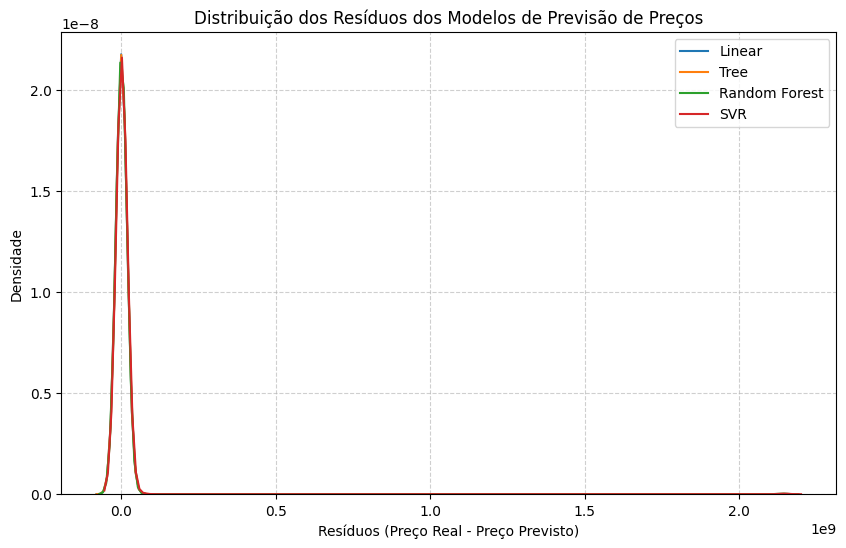

In [75]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test - pred_lr, label="Linear")
sns.kdeplot(y_test - pred_tree, label="Tree")
sns.kdeplot(y_test - pred_rf, label="Random Forest")
sns.kdeplot(y_test - pred_svr, label="SVR")

plt.title("Distribuição dos Resíduos dos Modelos de Previsão de Preços")
plt.xlabel("Resíduos (Preço Real - Preço Previsto)")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Conclusao

O modelo de Random Forest foi o que deu as melhores previsões, com menos erro nos resultados. A Regressão Linear também funcionou, mas errou mais, talvez por não conseguir entender bem algumas diferenças entre os imóveis. O SVR ficou no meio do caminho e poderia melhorar com alguns ajustes. No fim, dá pra perceber que o tamanho do imóvel influencia bastante no preço, e que modelos mais completos, como a Random Forest, conseguem fazer estimativas mais certeiras.